In [2]:
Image = "/mnt/Study_Storage/Documents/Datasets/Images/standard_test_images/lena_gray_256.tif" #gray

import cv2 
import skimage  
import numpy as np 


def show(img):
    cv2.imshow("image", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    

img = cv2.imread(Image, 0)
show(img)

### precision n recall

 - Precision and recall 
 - Four things: 
         - if we predict Positive: it can be true positive or false position, that is:
                 - true positive: intersection b/w correct and prediction
                 - false positive: we predicted positive but it's not positive
          - if we predict Negative that can be true negative or false negative
           that is:
                   - true negative: it's correct prediction that it's negative
                   - false negative: we predict it's negative but it's not negative in real.


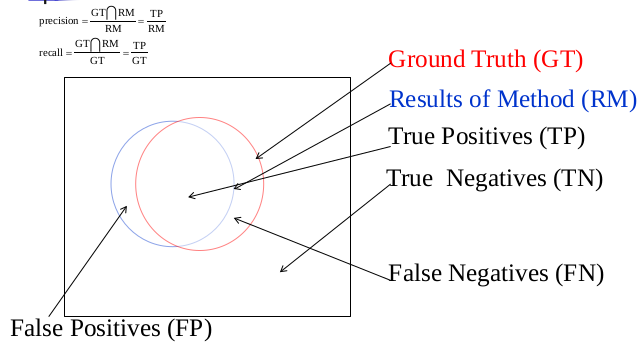

### prewit and sobel and scharr

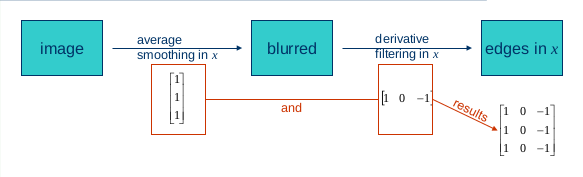

```python 

prewit < sobel < scharr in order of rotation invariance 

Return the square root of the sum of squares of the horizontal
and vertical Prewitt transforms. The edge magnitude depends slightly
on edge directions, since the approximation of the gradient operator by
the Prewitt operator is not completely rotation invariant. For a better
rotation invariance, the Scharr operator should be used. The Sobel operator
has a better rotation invariance than the Prewitt operator, but a worse
rotation invariance than the Scharr operator. 

```

In [9]:
img_prewit_x = filters.edges.prewitt_h(img)
img_prewit_y = filters.edges.prewitt_v(img)
img_prewit = filters.edges.prewitt(img) 


'''Return the square root of the sum of squares of the horizontal
and vertical Prewitt transforms. The edge magnitude depends slightly
on edge directions, since the approximation of the gradient operator by
the Prewitt operator is not completely rotation invariant. For a better
rotation invariance, the Scharr operator should be used. The Sobel operator
has a better rotation invariance than the Prewitt operator, but a worse
rotation invariance than the Scharr operator.'''

show(img_prewit_x)
show(img_prewit_y)
show(img_prewit)


In [10]:
img_sobel_x = filters.edges.sobel_h(img)
img_sobel_y = filters.edges.sobel_v(img)
img_sobel = filters.edges.sobel(img)

show(img_sobel_x)
show(img_sobel_y)
show(img_sobel)

In [11]:
img_scharr_x = filters.edges.scharr_h(img)
img_scharr_y = filters.edges.scharr_v(img)
img_scharr = filters.edges.scharr(img)

show(img_scharr_x)
show(img_scharr_y)
show(img_scharr)

### decomposition of 2 d into 2 1d

In [36]:
one_d = np.array([[1,1,1]])/3 

print(one_d.shape)

img_1_d = filters.edges.convolve(img, weights= one_d)
show(img_1_d)

one_d = np.array([[1],[1],[1]])/3 
print(one_d.shape)
show(filters.edges.convolve(img, weights= one_d)) 


(1, 3)
(3, 1)


(3, 1)


### laplace based

In [38]:
''' laplacian '''
from skimage import filters 

img_smooth = filters.gaussian(img, sigma= 1)
img_laplace = filters.laplace(img_smooth) 

# find zero crossings that is not done here 

# that it will be marr-hildreath edge detector 


show(img_laplace)

In [42]:
zero_crossings = np.where(np.diff(np.sign(img_laplace)))
print(zero_crossings[0].shape, zero_crossings[1].shape, img_laplace.shape)

(17949,) (17949,) (256, 256)


### canny

In [7]:
from skimage import feature 

In [49]:
canny = feature.canny(img, sigma = 1.0, low_threshold= 15, high_threshold= 35) # mask of binary edge points
canny_edge = np.multiply(canny, img)
show(canny_edge)


In [52]:
skimage.lookfor("laplace")

Search results for 'laplace'
----------------------------
skimage.filters.laplace
    Find the edges of an image using the Laplace operator.
skimage.filters.tests.test_edges.test_laplace_mask
    Laplace on a masked array should be zero.
skimage.filters.tests.test_edges.test_laplace_zeros
    Laplace on a square image.
